In [1]:
# import sys
# sys.path.append('/Users/pasquini/Bioinformatics/usr/lib/python3.7/site-packages')
# sys.path.append('/Users/pasquini/Library/Python/3.7/lib/python/site-packages/')
# sys.path.append('/Users/pasquini/Bioinformatics/software/leidenalg/build/lib.macosx-10.14-x86_64-3.7')
# import sys
# sys.path.append('/group/crtd_bergmann/Giovanni/software/scarches_biocluster/')

In [2]:
from collections import defaultdict
import scanpy as sc
import scanpy.external as sce
import scipy.io
# import scrublet as scr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
import scvelo as scv
#import velocyto as vcy
from os import listdir
from os.path import isfile, join
import glob
from collections import Counter
import loompy as lp
import numba
import llvmlite

# import mnnpy
from matplotlib import colors

In [3]:
#Define a nice colour map for gene expression
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [4]:
sc.settings.set_figure_params(dpi=80)
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

scanpy==1.8.2 anndata==0.7.8 umap==0.5.3 numpy==1.21.5 scipy==1.7.3 pandas==1.4.2 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.6 pynndescent==0.5.7


In [5]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())

['builtins',
 'builtins',
 'scanpy',
 'scanpy.external',
 'scipy',
 'pandas',
 'numpy',
 'matplotlib.pyplot',
 'itertools',
 'seaborn',
 'scvelo',
 'glob',
 'loompy',
 'numba',
 'llvmlite',
 'matplotlib.colors',
 'types']

In [6]:
sc.set_figure_params(dpi_save=1000)

**Read datasets**

In [7]:
HiQ = sc.read('./write/HiQ_final_adata.h5ad')

In [8]:
Bhaduri = sc.read('../../../../reference_datasets/notebook/Bhaduri_Human_Brain_organoids/write/annotated_adata.h5ad')

In [9]:
Kanton = sc.read('../../../../reference_datasets/notebook/Kanton_Brain_Organoids/write/processed_adata.h5ad')

In [10]:
ABA = sc.read_h5ad('../../../../reference_datasets/notebook/ABA_Human_M1_10x/write/processed_adata.h5ad')

**Compute STRESS-score**

By using 'PGK1', 'ARCN1', 'GORASP2' as marker genes

In [11]:

sc.tl.score_genes(HiQ,
                      ['PGK1', 'ARCN1', 'GORASP2'],
                      ctrl_size=50,
                      gene_pool=None,
                      n_bins=25,
                      score_name='Stress',
                      random_state=0,
                      copy=False,
                      use_raw=None)

sc.tl.score_genes(Bhaduri,
                      ['PGK1', 'ARCN1', 'GORASP2'],
                      ctrl_size=50,
                      gene_pool=None,
                      n_bins=25,
                      score_name='Stress',
                      random_state=0,
                      copy=False,
                      use_raw=None)

sc.tl.score_genes(Kanton,
                      ['PGK1', 'ARCN1', 'GORASP2'],
                      ctrl_size=50,
                      gene_pool=None,
                      n_bins=25,
                      score_name='Stress',
                      random_state=0,
                      copy=False,
                      use_raw=None)

sc.tl.score_genes(ABA,
                      ['PGK1', 'ARCN1', 'GORASP2'],
                      ctrl_size=50,
                      gene_pool=None,
                      n_bins=25,
                      score_name='Stress',
                      random_state=0,
                      copy=False,
                      use_raw=None)


computing score 'Stress'
    finished: added
    'Stress', score of gene set (adata.obs).
    100 total control genes are used. (0:00:01)
computing score 'Stress'
    finished: added
    'Stress', score of gene set (adata.obs).
    150 total control genes are used. (0:00:17)
computing score 'Stress'
    finished: added
    'Stress', score of gene set (adata.obs).
    150 total control genes are used. (0:00:07)
computing score 'Stress'
    finished: added
    'Stress', score of gene set (adata.obs).
    150 total control genes are used. (0:00:08)


In [12]:
adata = HiQ.concatenate(Bhaduri, Kanton, ABA,
                        join='inner',
                        batch_key = 'study',
                        batch_categories=['Hi-Q','Bhaduri','Kanton', 'Allen Brain Atlas']
                        )
del(HiQ)
del(Bhaduri)
del(Kanton)
del(ABA)

adata

AnnData object with n_obs × n_vars = 337128 × 16504
    obs: 'sample', 'batch', 'age', 'day', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'percent_mt2', 'n_counts', 'S_score', 'G2M_score', 'phase', 'pred_cell_type', 'leiden', 'dpt_pseudotime', 'draw_graph_fa_density_phase', 'cluster_name', 'Stress', 'Cluster', 'Sample', 'Line', 'Protocol', 'Age', 'iPSCorhESC', 'Class', 'State', 'Type', 'Subtype', 'louvain', 'Species', 'Stage', 'Barcode', 'PredCellType', 'nGene', 'nUMI', 'PercentMito', 'in_FullLineage', 'in_LineComp', 'in_DE', 'pseudocellIdx_FullLineage', 'pseudocellIdx_LineComp', 'pseudocellIdx_DE', 'cl_FullLineage', 'cl_LineComp', 'exp_component_name', 'cluster_label', 'cluster_color', 'cluster_order',

... storing 'leiden' as categorical
... storing 'Sample' as categorical
... storing 'Line' as categorical
... storing 'exp_component_name' as categorical


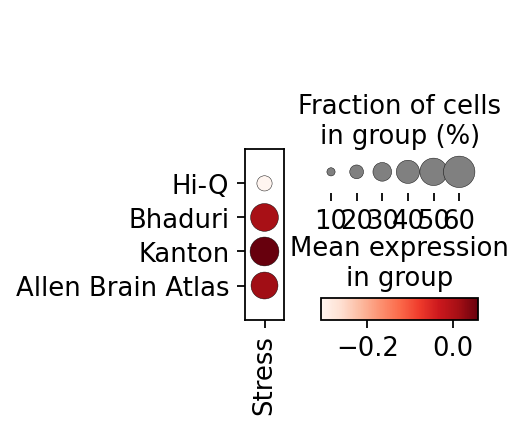

In [13]:
sc.pl.dotplot(adata, 'Stress', 'study', dendrogram=False)

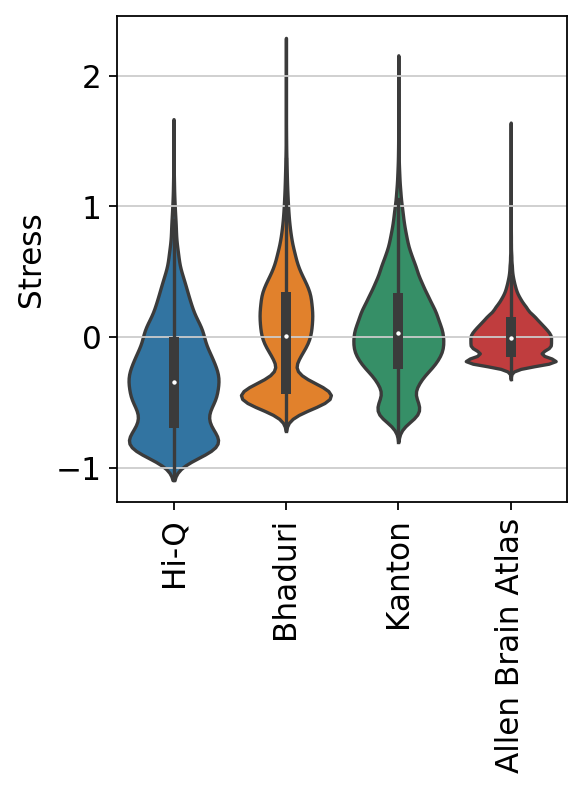

In [14]:
sc.pl.violin(adata, 'Stress', 'study',
             dendrogram=False,
             stripplot=False,
             inner='box',
             rotation = 90,
             save='_stress_comparison.svg'
            )

In [15]:
#############
# adata.write('./write/comparison_stress_adata.h5ad')
#############

In [16]:
adata

AnnData object with n_obs × n_vars = 337128 × 16504
    obs: 'sample', 'batch', 'age', 'day', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'percent_mt2', 'n_counts', 'S_score', 'G2M_score', 'phase', 'pred_cell_type', 'leiden', 'dpt_pseudotime', 'draw_graph_fa_density_phase', 'cluster_name', 'Stress', 'Cluster', 'Sample', 'Line', 'Protocol', 'Age', 'iPSCorhESC', 'Class', 'State', 'Type', 'Subtype', 'louvain', 'Species', 'Stage', 'Barcode', 'PredCellType', 'nGene', 'nUMI', 'PercentMito', 'in_FullLineage', 'in_LineComp', 'in_DE', 'pseudocellIdx_FullLineage', 'pseudocellIdx_LineComp', 'pseudocellIdx_DE', 'cl_FullLineage', 'cl_LineComp', 'exp_component_name', 'cluster_label', 'cluster_color', 'cluster_order',

In [17]:
HiQ_stress = adata[adata.obs['study'] == "Hi-Q"].obs.Stress

In [18]:
Bhaduri_stress = adata[adata.obs['study'] == "Bhaduri"].obs.Stress

In [19]:
Kanton_stress = adata[adata.obs['study'] == "Kanton"].obs.Stress

HiQ vs Bhaduri

In [20]:
scipy.stats.ranksums(HiQ_stress, y=Bhaduri_stress)

RanksumsResult(statistic=-83.44939905765438, pvalue=0.0)

In [21]:
scipy.stats.mannwhitneyu(HiQ_stress, y=Bhaduri_stress)

MannwhitneyuResult(statistic=746671450.5, pvalue=0.0)

In [22]:
scipy.stats.ttest_ind(HiQ_stress, Bhaduri_stress)

Ttest_indResult(statistic=-89.84513098977455, pvalue=0.0)

HiQ vs Kanton

In [23]:
scipy.stats.ranksums(HiQ_stress, y=Kanton_stress)

RanksumsResult(statistic=-96.57005462457484, pvalue=0.0)

In [24]:
scipy.stats.mannwhitneyu(HiQ_stress, y=Kanton_stress)

MannwhitneyuResult(statistic=328500419.5, pvalue=0.0)

In [25]:
scipy.stats.ttest_ind(HiQ_stress, Kanton_stress)

Ttest_indResult(statistic=-106.56249220620577, pvalue=0.0)

Kanton vs Bhaduri

In [26]:
scipy.stats.ranksums(Kanton_stress, y=Bhaduri_stress)

RanksumsResult(statistic=29.189170438771797, pvalue=2.661307507238068e-187)

In [27]:
scipy.stats.mannwhitneyu(Kanton_stress, y=Bhaduri_stress)

MannwhitneyuResult(statistic=7208113779.5, pvalue=2.6613098534134615e-187)

In [28]:
scipy.stats.ttest_ind(Kanton_stress, Bhaduri_stress)

Ttest_indResult(statistic=28.28050310148684, pvalue=1.1530148410193364e-175)

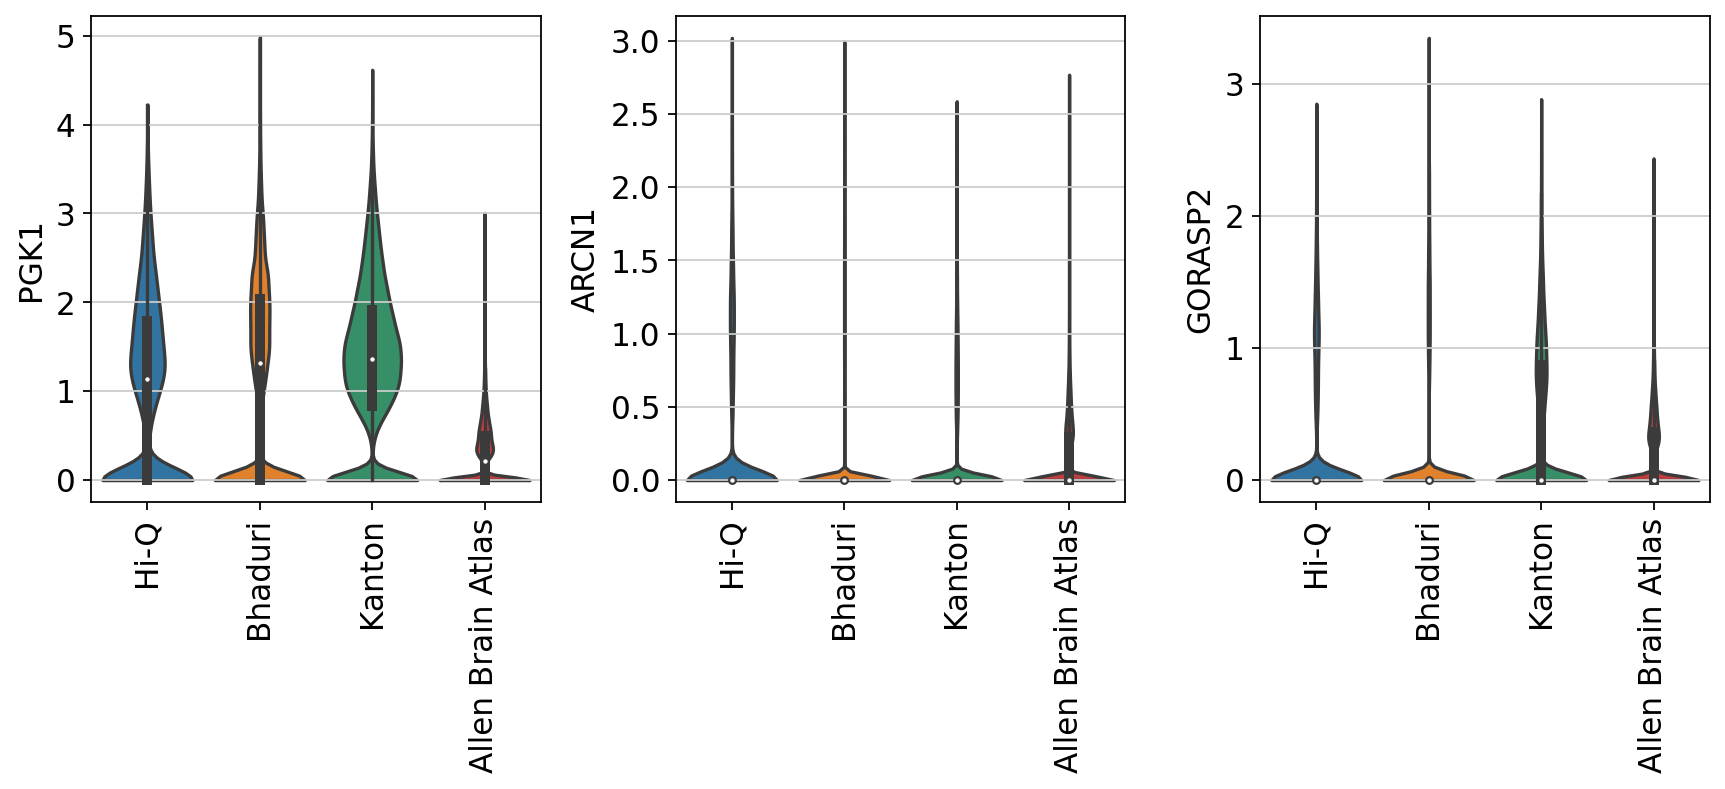

In [29]:
sc.pl.violin(adata, ['PGK1', 'ARCN1', 'GORASP2'], 'study',
             dendrogram=False,
             stripplot=False,
             inner='box',
             rotation = 90,
             save='_stress_GENES_comparison.svg'
            )